Saving Sample - Superstore.csv to Sample - Superstore.csv
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Produc

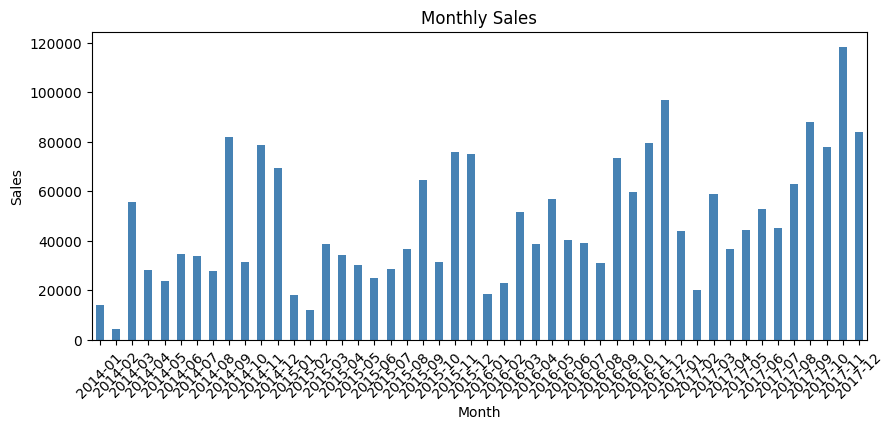

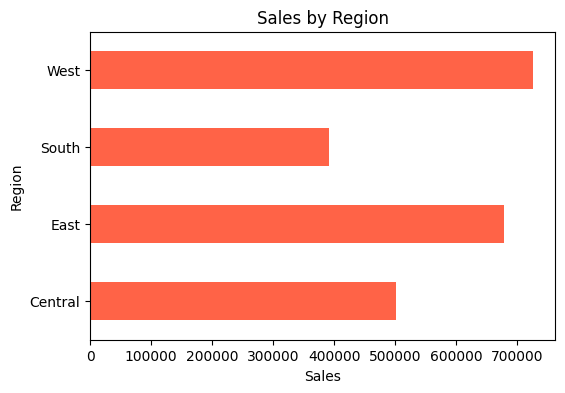

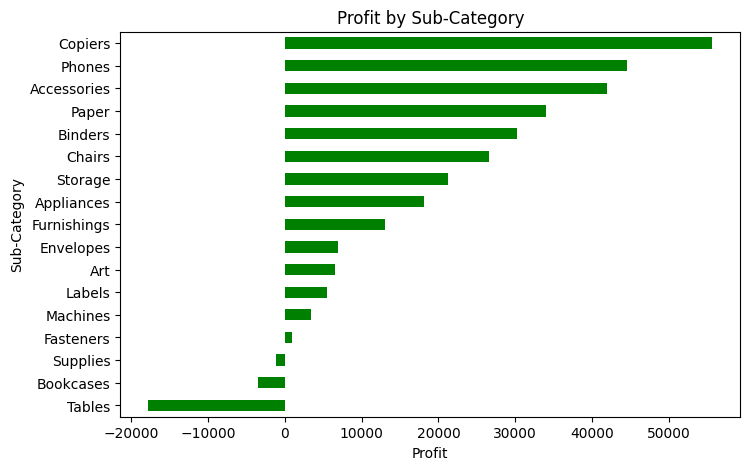

Top Month: 2017-11
Top Region: West
Most Profitable Sub-Category: Copiers


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# upload csv
files.upload()

# load the data
# Add the encoding parameter to handle potential encoding issues
df = pd.read_csv('Sample - Superstore.csv', encoding='latin-1')
print(df.head())

# convert order date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# extract month
df['Month'] = df['Order Date'].dt.to_period('M')

# check for nulls
print(df.isnull().sum())

# total sales by month
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10,4))
monthly_sales.plot(kind='bar', color='steelblue')
plt.title('Monthly Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# region-wise sales
reg_sales = df.groupby('Region')['Sales'].sum()

plt.figure(figsize=(6,4))
reg_sales.plot(kind='barh', color='tomato')
plt.title('Sales by Region')
plt.xlabel('Sales')
plt.show()

# profit by sub-category
sub_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()

plt.figure(figsize=(8,5))
sub_profit.plot(kind='barh', color='green')
plt.title('Profit by Sub-Category')
plt.xlabel('Profit')
plt.show()

# summary
print("Top Month:", monthly_sales.idxmax())
print("Top Region:", reg_sales.idxmax())
print("Most Profitable Sub-Category:", sub_profit.idxmax())